### Importar dados
Primeiramente vamos importar os dados com os testes feitos, trata-los e assim realizar uma análise sobre os pontos mais importantes.

In [32]:
import pandas as pd
import numpy as np

data_url = 'tests.csv'
dome_data = pd.read_csv(data_url)
dome_data

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent
0,0,"add student with name=anderson martins gomes, ...",ADD,student,"{'name': 'Anderson Martins Gomes', 'age': '20'}",NaN,"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE
1,1,"add subject with name=brazilian history, descr...",ADD,subject,"{'name': 'Brazilian History', 'description': '...",NaN,"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE
2,2,"add teacher with name=paulo henrique, age=65, ...",ADD,teacher,"{'name': 'Paulo Henrique', 'age': '65', 'email...",NaN,"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE
3,3,"add subject with name=math, description=the be...",ADD,subject,"{'name': 'Math', 'description': 'The best subj...",NaN,"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE
4,4,"add subject with name=math, description='the b...",ADD,subject,"{'name': 'Math', 'description': 'The best subj...",NaN,"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE
...,...,...,...,...,...,...,...,...,...,...
454,466,add an invoice with value=100,ADD,invoice,{'value': '100'},NaN,{'value': '100'},{},invoice,CREATE
455,467,get all invoice,READ,invoice,NaN,NaN,{},{},invoice,READ
456,468,add car with license=2020,ADD,car,{'license': '2020'},NaN,{'license': '2020'},{},car,CREATE
457,469,add car with color=black,ADD,car,{'color': 'black'},NaN,{'color': 'black'},{},car,CREATE


### Pós processamento dos dados
Com os testes feitos iremos tratar a tabela para realizar a análise.

Primeiramente, para fins de obtenção de resultados, iremos passar um algoritimo que verifique quantos atributos/filters (se existirem) são requeridos em cada linha. Isso irá nos indicar até quantos atributos o sistema consegue ter uma boa precisão.

Por o dataset ainda conter diversas incoerências principalmente na questão de letras maiúsculas e minusculas, como na primeira linha na qual a mensagem possui somente letras minusculas porém em expected attributes existem letras maiúsculas, todas as linhas de processed e expected para attributes e filters serão 'normalizadas' e ficarão minúsculas.

Além disso iremos substituir os valores nulos das colunas expected attributes e expected filter por chaves vazias, para que os valores se encaixem com a resposta 'nula' da API, que são chaves vazias.

É importante também mudar todos os valores 'ADD' na coluna de expected intent para que se adequem a como a API retorna (CREATE).

Por fim iremos remover colunas indesejadas.



In [34]:
import ast

def count_keys(cell):
    if pd.isnull(cell): 
        return 0
    try:
        dictionary = ast.literal_eval(cell) 
        if isinstance(dictionary, dict):
            return len(dictionary.keys()) 
    except (ValueError, SyntaxError):
        return 0 
    return 0

dome_data['total_attributes'] = dome_data['expected_attributes'].apply(count_keys) + dome_data['expected_filter_attributes'].apply(count_keys)
dome_data.head(10)

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent,total_attributes
0,0,"add student with name=anderson martins gomes, ...",ADD,student,"{'name': 'Anderson Martins Gomes', 'age': '20'}",NaN,"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE,2
1,1,"add subject with name=brazilian history, descr...",ADD,subject,"{'name': 'Brazilian History', 'description': '...",NaN,"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE,2
2,2,"add teacher with name=paulo henrique, age=65, ...",ADD,teacher,"{'name': 'Paulo Henrique', 'age': '65', 'email...",NaN,"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE,3
3,3,"add subject with name=math, description=the be...",ADD,subject,"{'name': 'Math', 'description': 'The best subj...",NaN,"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE,2
4,4,"add subject with name=math, description='the b...",ADD,subject,"{'name': 'Math', 'description': 'The best subj...",NaN,"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE,2
5,5,add student name=anderson,ADD,student,{'name': 'Anderson'},NaN,{'name': 'anderson'},{},student,CREATE,1
6,6,get students with name anderson,READ,student,NaN,{'name': 'anderson'},{},{'name': 'anderson'},students,READ,1
7,7,show me the teachers,READ,teacher,NaN,NaN,{},{},teachers,READ,0
8,8,show teachers,READ,teacher,NaN,NaN,{},{},teachers,READ,0
9,9,show teacher,READ,teacher,NaN,NaN,{},{'teacher': ''},show,READ,0


In [35]:
dome_data.expected_attributes = dome_data.expected_attributes.str.lower()
dome_data.expected_filter_attributes = dome_data.expected_filter_attributes.str.lower()
dome_data.processed_attributes = dome_data.processed_attributes.str.lower()
dome_data.processed_filters = dome_data.processed_filters.str.lower()
dome_data.head(10)

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent,total_attributes
0,0,"add student with name=anderson martins gomes, ...",ADD,student,"{'name': 'anderson martins gomes', 'age': '20'}",NaN,"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE,2
1,1,"add subject with name=brazilian history, descr...",ADD,subject,"{'name': 'brazilian history', 'description': '...",NaN,"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE,2
2,2,"add teacher with name=paulo henrique, age=65, ...",ADD,teacher,"{'name': 'paulo henrique', 'age': '65', 'email...",NaN,"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE,3
3,3,"add subject with name=math, description=the be...",ADD,subject,"{'name': 'math', 'description': 'the best subj...",NaN,"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE,2
4,4,"add subject with name=math, description='the b...",ADD,subject,"{'name': 'math', 'description': 'the best subj...",NaN,"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE,2
5,5,add student name=anderson,ADD,student,{'name': 'anderson'},NaN,{'name': 'anderson'},{},student,CREATE,1
6,6,get students with name anderson,READ,student,NaN,{'name': 'anderson'},{},{'name': 'anderson'},students,READ,1
7,7,show me the teachers,READ,teacher,NaN,NaN,{},{},teachers,READ,0
8,8,show teachers,READ,teacher,NaN,NaN,{},{},teachers,READ,0
9,9,show teacher,READ,teacher,NaN,NaN,{},{'teacher': ''},show,READ,0


In [36]:
dome_data.expected_attributes = dome_data.expected_attributes.fillna('{}')
dome_data.expected_filter_attributes = dome_data.expected_filter_attributes.fillna('{}')
dome_data.head(10)

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent,total_attributes
0,0,"add student with name=anderson martins gomes, ...",ADD,student,"{'name': 'anderson martins gomes', 'age': '20'}",{},"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE,2
1,1,"add subject with name=brazilian history, descr...",ADD,subject,"{'name': 'brazilian history', 'description': '...",{},"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE,2
2,2,"add teacher with name=paulo henrique, age=65, ...",ADD,teacher,"{'name': 'paulo henrique', 'age': '65', 'email...",{},"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE,3
3,3,"add subject with name=math, description=the be...",ADD,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE,2
4,4,"add subject with name=math, description='the b...",ADD,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE,2
5,5,add student name=anderson,ADD,student,{'name': 'anderson'},{},{'name': 'anderson'},{},student,CREATE,1
6,6,get students with name anderson,READ,student,{},{'name': 'anderson'},{},{'name': 'anderson'},students,READ,1
7,7,show me the teachers,READ,teacher,{},{},{},{},teachers,READ,0
8,8,show teachers,READ,teacher,{},{},{},{},teachers,READ,0
9,9,show teacher,READ,teacher,{},{},{},{'teacher': ''},show,READ,0


In [37]:
dome_data['expected_intent'] = dome_data['expected_intent'].replace('ADD', 'CREATE')
dome_data.head(10)

,Unnamed: 0,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent,total_attributes
0,0,"add student with name=anderson martins gomes, ...",CREATE,student,"{'name': 'anderson martins gomes', 'age': '20'}",{},"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE,2
1,1,"add subject with name=brazilian history, descr...",CREATE,subject,"{'name': 'brazilian history', 'description': '...",{},"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE,2
2,2,"add teacher with name=paulo henrique, age=65, ...",CREATE,teacher,"{'name': 'paulo henrique', 'age': '65', 'email...",{},"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE,3
3,3,"add subject with name=math, description=the be...",CREATE,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE,2
4,4,"add subject with name=math, description='the b...",CREATE,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE,2
5,5,add student name=anderson,CREATE,student,{'name': 'anderson'},{},{'name': 'anderson'},{},student,CREATE,1
6,6,get students with name anderson,READ,student,{},{'name': 'anderson'},{},{'name': 'anderson'},students,READ,1
7,7,show me the teachers,READ,teacher,{},{},{},{},teachers,READ,0
8,8,show teachers,READ,teacher,{},{},{},{},teachers,READ,0
9,9,show teacher,READ,teacher,{},{},{},{'teacher': ''},show,READ,0


In [38]:
dome_data = dome_data.drop(dome_data.columns[0], axis=1)
dome_data.columns

Index(['user_msg', 'expected_intent', 'expected_class', 'expected_attributes',
       'expected_filter_attributes', 'processed_attributes',
       'processed_filters', 'find_entity', 'find_intent', 'total_attributes'],
      dtype='object')

### Análise
Iremos fazer duas análises: Uma que compara se as respostas de cada dado encontrado está exatamente igual ao esperado, e outra que mede a similaridade (entre 1 a 100) entre os resultados. Essa segunda opção é uma análise secundária que, por ser uma análise mais profunda, nos dará uma noção de o quanto o sistema entende o que queremos com a mensagem e não reduz os resultados à apenas certo ou errado.

### Análise de similaridade
Para a análise objetiva criaremos as colunas:

similarity_intent (Similaridade de 0 a 100 entre intenção esperada e obtida)
similarity_entity (Similaridade de 0 a 100 entre entidade esperada e obtida)
similarity_attribute (Similaridade de 0 a 100 entre atributo esperada e obtida)
similarity_filter (Similaridade de 0 a 100 entre filtro esperada e obtida)
similarity_answer (média entre as 4 similaridades obtidas)
Com isso iremos extrair:

média de similaridade para cada operação CRUD
média de similaridade para cada quantidade de atributo

In [47]:
!pip install rapidfuzz
from rapidfuzz import fuzz
fuzz.ratio("this is a test", "this is a test!")

96.55172413793103

In [49]:
for index, line in dome_data.iterrows():
    intent_sim = fuzz.ratio(str(line['expected_intent']), str(line['find_intent']))
    entity_sim = fuzz.ratio(str(line['expected_class']), str(line['find_entity']))
    att_sim = fuzz.ratio(str(line['expected_attributes']), str(line['processed_attributes']))
    filter_sim = fuzz.ratio(str(line['expected_filter_attributes']), str(line['processed_filters']))
    total_sim = (intent_sim + entity_sim + att_sim + filter_sim)/4
    dome_data = dome_data.copy()
    dome_data.loc[index, 'intent_similarity'] = intent_sim
    dome_data.loc[index, 'entity_similarity'] = entity_sim
    dome_data.loc[index, 'attributes_similarity'] = att_sim
    dome_data.loc[index, 'filters_similarity'] = filter_sim
    dome_data.loc[index, 'similarity_media'] = total_sim
dome_data

,user_msg,expected_intent,expected_class,expected_attributes,expected_filter_attributes,processed_attributes,processed_filters,find_entity,find_intent,total_attributes,intent_similarity,entity_similarity,attributes_similarity,filters_similarity,similarity_media
0,"add student with name=anderson martins gomes, ...",CREATE,student,"{'name': 'anderson martins gomes', 'age': '20'}",{},"{'name': 'anderson martins gomes', 'age': '20'}",{},student,CREATE,2,100.0,100.000000,100.000000,100.0,100.000000
1,"add subject with name=brazilian history, descr...",CREATE,subject,"{'name': 'brazilian history', 'description': '...",{},"{'name': 'brazilian history', 'history': 'hist...",{},subject,CREATE,2,100.0,100.000000,81.300813,100.0,95.325203
2,"add teacher with name=paulo henrique, age=65, ...",CREATE,teacher,"{'name': 'paulo henrique', 'age': '65', 'email...",{},"{'name': 'paulo henrique', 'age': '65', 'email...",{},teacher,CREATE,3,100.0,100.000000,92.537313,100.0,98.134328
3,"add subject with name=math, description=the be...",CREATE,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': 'the best subj...",{},subject,CREATE,2,100.0,100.000000,100.000000,100.0,100.000000
4,"add subject with name=math, description='the b...",CREATE,subject,"{'name': 'math', 'description': 'the best subj...",{},"{'name': 'math', 'description': ""'the best sub...",{},subject,CREATE,2,100.0,100.000000,98.275862,100.0,99.568966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,add an invoice with value=100,CREATE,invoice,{'value': '100'},{},{'value': '100'},{},invoice,CREATE,1,100.0,100.000000,100.000000,100.0,100.000000
455,get all invoice,READ,invoice,{},{},{},{},invoice,READ,0,100.0,100.000000,100.000000,100.0,100.000000
456,add car with license=2020,CREATE,car,{'license': '2020'},{},{'license': '2020'},{},car,CREATE,1,100.0,100.000000,100.000000,100.0,100.000000
457,add car with color=black,CREATE,car,{'color': 'black'},{},{'color': 'black'},{},car,CREATE,1,100.0,100.000000,100.000000,100.0,100.000000


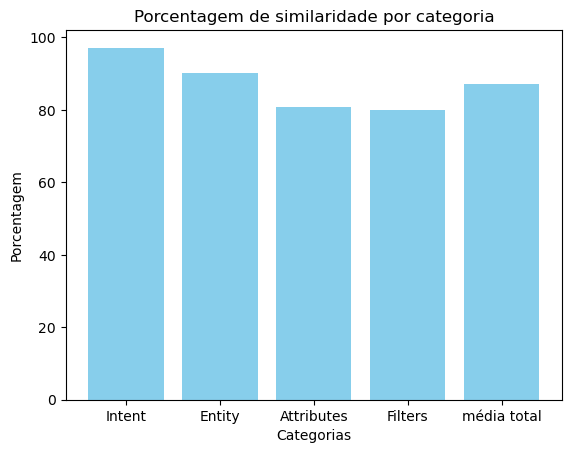

In [55]:
import matplotlib.pyplot as plt

plt.bar(['Intent', 'Entity', 'Attributes', 'Filters', 'média total'], [dome_data.intent_similarity.mean(),dome_data.entity_similarity.mean(), dome_data.attributes_similarity.mean(), dome_data.filters_similarity.mean(), dome_data.similarity_media.mean()], color='skyblue')

plt.title('Porcentagem de similaridade por categoria')
plt.xlabel('Categorias')
plt.ylabel('Porcentagem')

plt.show()

In [83]:
mean_by_att = dome_data.groupby('total_attributes')['attributes_similarity'].mean()
mean_by_att

total_attributes
0    98.508177
1    88.586704
2    63.069297
3    71.159350
4    67.641346
5    68.473749
7    42.929293
Name: attributes_similarity, dtype: float64

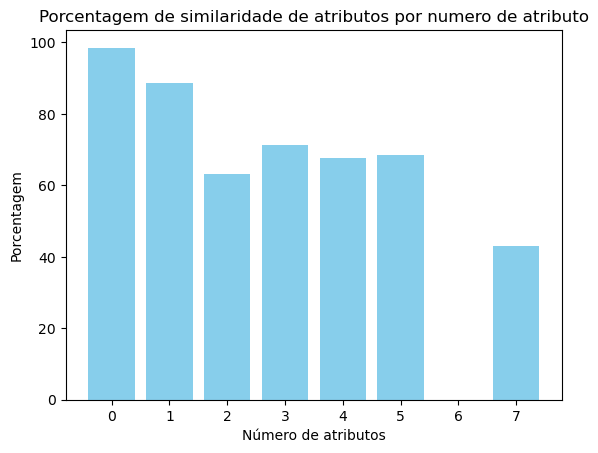

In [101]:
plt.bar(mean_by_att.index, mean_by_att, color='skyblue')

plt.title('Porcentagem de similaridade de atributos por numero de atributo')
plt.xlabel('Número de atributos')
plt.ylabel('Porcentagem')

plt.show()

In [95]:
mean_by_filter = dome_data.groupby('total_attributes')['filters_similarity'].mean()
mean_by_filter

total_attributes
0     68.847832
1     87.925339
2     78.757675
3     74.949319
4    100.000000
5    100.000000
7    100.000000
Name: filters_similarity, dtype: float64

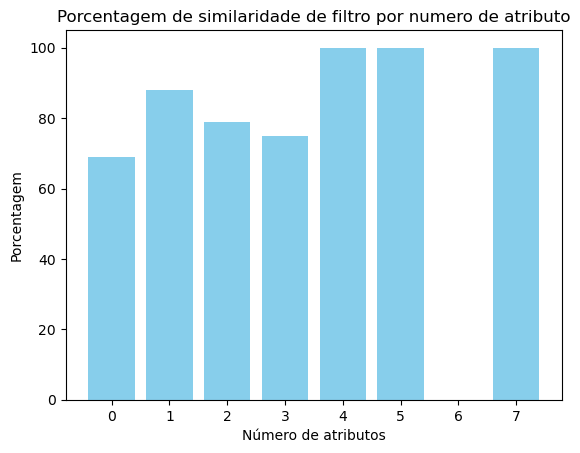

In [99]:
plt.bar(mean_by_filter.index, mean_by_filter, color='skyblue')

plt.title('Porcentagem de similaridade de filtro por numero de atributo')
plt.xlabel('Número de atributos')
plt.ylabel('Porcentagem')

plt.show()

In [103]:
mean_tot = dome_data.groupby('total_attributes')['similarity_media'].mean()
mean_tot

total_attributes
0    87.784563
1    90.122976
2    83.721385
3    84.038479
4    89.566587
5    92.118437
7    65.277778
Name: similarity_media, dtype: float64

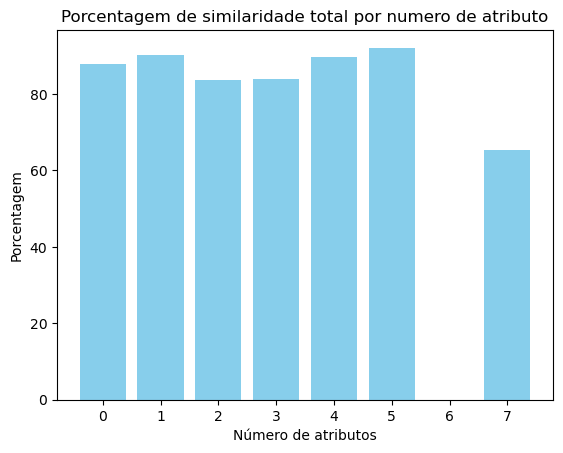

In [105]:
plt.bar(mean_tot.index, mean_tot, color='skyblue')

plt.title('Porcentagem de similaridade total por numero de atributo')
plt.xlabel('Número de atributos')
plt.ylabel('Porcentagem')

plt.show()

In [107]:
mean_by_opr = dome_data.groupby('expected_intent')['similarity_media'].mean()
mean_by_opr

expected_intent
CREATE    89.425831
DELETE    89.713038
READ      89.480620
UPDATE    78.238769
Name: similarity_media, dtype: float64

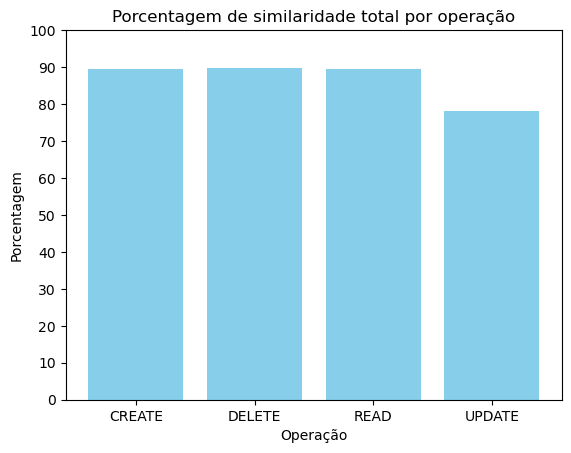

In [115]:
plt.bar(mean_by_opr.index, mean_by_opr, color='skyblue')
plt.yticks(ticks=range(0, 101, 10))

plt.title('Porcentagem de similaridade total por operação')
plt.xlabel('Operação')
plt.ylabel('Porcentagem')

plt.show()

In [117]:
dome_data.similarity_media.describe()

count    459.000000
mean      87.060039
std       14.838294
min       24.479432
25%       78.347393
50%       93.750000
75%       98.913043
max      100.000000
Name: similarity_media, dtype: float64

In [131]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 2.4 MB/s eta 0:00:002.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 10.9 MB/s eta 0:00:0031m23.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 13.2 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=0927e9b40af3d5cd9a058d504146e4bfc4ef62cadff7382d683f28efdf39e5b6
  Stored in directory: /home/gabriel/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully

In [133]:
profile = ProfileReport(dome_data, explorative=True)
profile.to_file("relatorio.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]